In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 22.4 MB/s eta 0:00:00


# 라이브러리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
customer = pd.read_csv('/content/drive/MyDrive/DATA/DACON/이커머스고객/Customer_info.csv',encoding='utf-8')
online = pd.read_csv('/content/drive/MyDrive/DATA/DACON/이커머스고객/Onlinesales_info.csv',encoding='utf-8')
marketing = pd.read_csv('/content/drive/MyDrive/DATA/DACON/이커머스고객/Marketing_info.csv',encoding='utf-8')
discount = pd.read_csv('/content/drive/MyDrive/DATA/DACON/이커머스고객/Discount_info.csv',encoding='utf-8')
tax = pd.read_csv('/content/drive/MyDrive/DATA/DACON/이커머스고객/Tax_info.csv',encoding='utf-8')

In [ ]:
import datetime
online['거래날짜'] = pd.to_datetime(online['거래날짜'])

online['월'] = online['거래날짜'].dt.month_name()
online['요일'] = online['거래날짜'].dt.day_name()

online.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,요일
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,January,Tuesday
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,January,Tuesday
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,January,Tuesday
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,January,Tuesday
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,January,Tuesday


# Recency : (2020-01-01) - 거래날짜

In [ ]:
recency = online.sort_values('거래날짜').drop_duplicates(subset='고객ID', keep='last')
recency['거래날짜'] = pd.to_datetime(recency['거래날짜'])
recency['Recency'] = (pd.Timestamp('2020-01-01') - recency['거래날짜']).dt.days
recency = recency.sort_values(by='고객ID', ascending=True)
recency

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,요일,Recency
38125,USER_0000,Transaction_16900,2019-09-15,Product_0946,Office,2,5.50,75.00,Used,September,Sunday,108
44637,USER_0001,Transaction_20186,2019-11-02,Product_0994,Nest,1,349.00,12.99,Used,November,Saturday,60
42781,USER_0002,Transaction_19259,2019-10-19,Product_0984,Nest-USA,3,79.00,6.00,Clicked,October,Saturday,74
50748,USER_0003,Transaction_23706,2019-12-14,Product_0404,Apparel,2,17.93,6.50,Not Used,December,Saturday,18
38116,USER_0004,Transaction_16899,2019-09-15,Product_0251,Apparel,1,16.50,75.00,Clicked,September,Sunday,108
...,...,...,...,...,...,...,...,...,...,...,...,...
12218,USER_1463,Transaction_5983,2019-04-05,Product_0900,Drinkware,1,10.39,6.50,Not Used,April,Friday,271
40980,USER_1464,Transaction_18316,2019-10-05,Product_0865,Bags,3,55.99,12.91,Used,October,Saturday,88
23124,USER_1465,Transaction_10833,2019-06-20,Product_0506,Apparel,1,14.69,6.00,Clicked,June,Thursday,195
43154,USER_1466,Transaction_19461,2019-10-23,Product_0981,Nest-USA,2,149.00,6.00,Not Used,October,Wednesday,70


In [ ]:
recency = recency[['고객ID', 'Recency']]
recency

,고객ID,Recency
38125,USER_0000,108
44637,USER_0001,60
42781,USER_0002,74
50748,USER_0003,18
38116,USER_0004,108
...,...,...
12218,USER_1463,271
40980,USER_1464,88
23124,USER_1465,195
43154,USER_1466,70


# Frequency : 거래횟수

In [ ]:
frequency = online.groupby('고객ID').size().reset_index(name='Frequency')
frequency

,고객ID,Frequency
0,USER_0000,2
1,USER_0001,60
2,USER_0002,23
3,USER_0003,17
4,USER_0004,36
...,...,...
1463,USER_1463,7
1464,USER_1464,40
1465,USER_1465,8
1466,USER_1466,1


# Monetary : 수량 * 평균금액 * 할인율 * GST
- 쿠폰 사용 used ➡️ 할인율 적용

In [ ]:
discount['할인율'] = discount['할인율']*0.1
discount

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,0.1
1,Feb,Apparel,SALE20,0.2
2,Mar,Apparel,SALE30,0.3
3,Jan,Nest-USA,ELEC10,0.1
4,Feb,Nest-USA,ELEC20,0.2
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,0.2
200,Dec,Notebooks & Journals,NJ30,0.3
201,Oct,Android,AND10,0.1
202,Nov,Android,AND20,0.2


In [ ]:
tax

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


In [ ]:
tax['GST'].unique()

array([0.1 , 0.18, 0.05, 0.12])

In [ ]:
merged_step1 = pd.merge(online, tax, on='제품카테고리', how='inner')
merged_step1.isnull().sum()

고객ID      0
거래ID      0
거래날짜      0
제품ID      0
제품카테고리    0
수량        0
평균금액      0
배송료       0
쿠폰상태      0
월         0
요일        0
GST       0
dtype: int64

In [ ]:
merged_step1.head(3)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,요일,GST
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jan,Tuesday,0.1
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jan,Tuesday,0.1
2,USER_0190,Transaction_0004,2019-01-01,Product_0983,Nest-USA,2,122.77,6.5,Clicked,Jan,Tuesday,0.1


In [ ]:
month_mapping = {
    'January': 'Jan',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Apr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Aug',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dec'
}

online['월'] = online['월'].map(month_mapping)

In [ ]:
final_merged = pd.merge(merged_step1, discount, on=['월', '제품카테고리'], how='inner')
final_merged.isnull().sum()

고객ID      0
거래ID      0
거래날짜      0
제품ID      0
제품카테고리    0
수량        0
평균금액      0
배송료       0
쿠폰상태      0
월         0
요일        0
GST       0
쿠폰코드      0
할인율       0
dtype: int64

In [ ]:
final_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52524 entries, 0 to 52523
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   고객ID    52524 non-null  object        
 1   거래ID    52524 non-null  object        
 2   거래날짜    52524 non-null  datetime64[ns]
 3   제품ID    52524 non-null  object        
 4   제품카테고리  52524 non-null  object        
 5   수량      52524 non-null  int64         
 6   평균금액    52524 non-null  float64       
 7   배송료     52524 non-null  float64       
 8   쿠폰상태    52524 non-null  object        
 9   월       52524 non-null  object        
 10  요일      52524 non-null  object        
 11  GST     52524 non-null  float64       
 12  쿠폰코드    52524 non-null  object        
 13  할인율     52524 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)
memory usage: 6.0+ MB


In [ ]:
final_merged['제품카테고리'].unique()

array(['Nest-USA', 'Office', 'Apparel', 'Bags', 'Drinkware', 'Lifestyle',
       'Notebooks & Journals', 'Headgear', 'Waze', 'Nest-Canada',
       'Bottles', 'Gift Cards', 'Housewares', 'Android', 'Accessories',
       'Nest'], dtype=object)

In [ ]:
discount['제품카테고리'].unique()

array(['Apparel', 'Nest-USA', 'Office', 'Drinkware', 'Lifestyle', 'Bags',
       'Notebooks', 'Headgear', 'Nest', 'Waze', 'Bottles', 'Nest-Canada',
       'Housewares', 'Accessories', 'Gift Cards', 'Notebooks & Journals',
       'Android'], dtype=object)

In [ ]:
tax['제품카테고리'].unique()

array(['Nest-USA', 'Office', 'Apparel', 'Bags', 'Drinkware', 'Lifestyle',
       'Notebooks & Journals', 'Headgear', 'Waze', 'Fun', 'Nest-Canada',
       'Backpacks', 'Google', 'Bottles', 'Gift Cards', 'More Bags',
       'Housewares', 'Android', 'Accessories', 'Nest'], dtype=object)

In [ ]:
final_merged.head(3)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,요일,GST,쿠폰코드,할인율
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jan,Tuesday,0.1,ELEC10,0.1
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,Jan,Tuesday,0.1,ELEC10,0.1
2,USER_0190,Transaction_0004,2019-01-01,Product_0983,Nest-USA,2,122.77,6.5,Clicked,Jan,Tuesday,0.1,ELEC10,0.1


In [ ]:
merged_df = final_merged.copy()

def calculate_money(row):
    if row['쿠폰상태'] == 'Used':
        return row['수량'] * row['평균금액'] * (1 - row['할인율']) * (1 + row['GST'])
    else:
        return row['수량'] * row['평균금액'] * (1 + row['GST'])

merged_df['money'] = merged_df.apply(calculate_money, axis=1)
merged_df = merged_df.sort_values(by='고객ID', ascending=True)
merged_df

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,요일,GST,쿠폰코드,할인율,money
18898,USER_0000,Transaction_16900,2019-09-15,Product_0946,Office,2,5.50,75.00,Used,Sep,Sunday,0.10,OFF30,0.3,8.47000
34804,USER_0000,Transaction_16900,2019-09-15,Product_0048,Apparel,1,19.99,75.00,Used,Sep,Sunday,0.18,SALE30,0.3,16.51174
36603,USER_0001,Transaction_20185,2019-11-02,Product_0448,Apparel,1,3.40,6.00,Not Used,Nov,Saturday,0.18,SALE20,0.2,4.01200
36604,USER_0001,Transaction_20185,2019-11-02,Product_0595,Apparel,1,3.40,6.00,Not Used,Nov,Saturday,0.18,SALE20,0.2,4.01200
36605,USER_0001,Transaction_20185,2019-11-02,Product_0646,Apparel,1,21.00,6.00,Clicked,Nov,Saturday,0.18,SALE20,0.2,24.78000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10266,USER_1467,Transaction_18633,2019-10-10,Product_0976,Nest-USA,1,119.00,6.00,Clicked,Oct,Thursday,0.10,ELEC10,0.1,130.90000
10265,USER_1467,Transaction_18632,2019-10-10,Product_0983,Nest-USA,2,119.00,6.00,Used,Oct,Thursday,0.10,ELEC10,0.1,235.62000
10264,USER_1467,Transaction_18630,2019-10-10,Product_0976,Nest-USA,1,199.00,19.99,Clicked,Oct,Thursday,0.10,ELEC10,0.1,218.90000
45798,USER_1467,Transaction_13439,2019-07-29,Product_0917,Lifestyle,1,3.50,6.00,Clicked,Jul,Monday,0.18,EXTRA10,0.1,4.13000


In [ ]:
merged_df.isnull().sum()

고객ID      0
거래ID      0
거래날짜      0
제품ID      0
제품카테고리    0
수량        0
평균금액      0
배송료       0
쿠폰상태      0
월         0
요일        0
GST       0
쿠폰코드      0
할인율       0
money     0
dtype: int64

In [ ]:
monetary = merged_df.groupby(['고객ID'])['money'].sum().reset_index()
monetary.rename(columns={'money': 'Monetary'}, inplace=True)
monetary

,고객ID,Monetary
0,USER_0000,24.98174
1,USER_0001,14997.08596
2,USER_0002,1492.40594
3,USER_0003,1339.55528
4,USER_0004,1369.93900
...,...,...
1463,USER_1463,561.59980
1464,USER_1464,2328.89972
1465,USER_1465,115.40750
1466,USER_1466,327.80000


# RFM

In [ ]:
RFM_df = pd.merge(recency, frequency, on='고객ID', how='inner')
RFM = pd.merge(RFM_df, monetary, on='고객ID', how='inner')
RFM

,고객ID,Recency,Frequency,Monetary
0,USER_0000,108,2,24.98174
1,USER_0001,60,60,14997.08596
2,USER_0002,74,23,1492.40594
3,USER_0003,18,17,1339.55528
4,USER_0004,108,36,1369.93900
...,...,...,...,...
1463,USER_1463,271,7,561.59980
1464,USER_1464,88,40,2328.89972
1465,USER_1465,195,8,115.40750
1466,USER_1466,70,1,327.80000


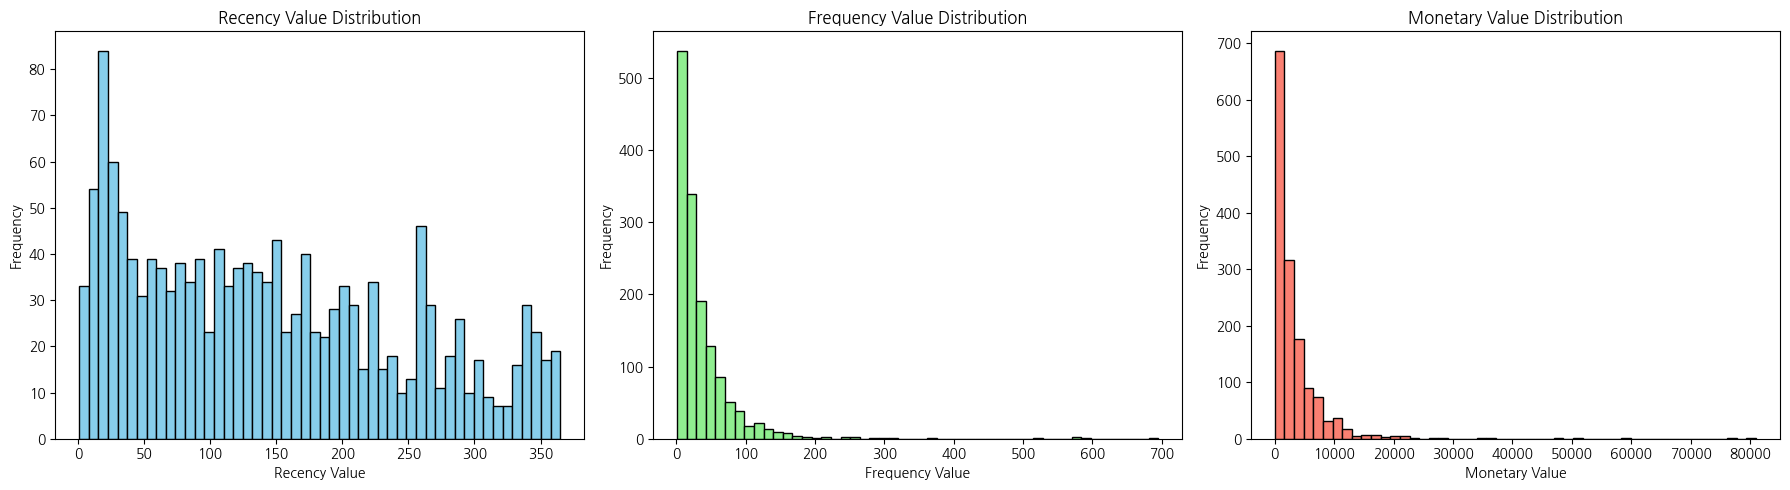

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(RFM['Recency'], bins=50, color='skyblue', edgecolor='black')
plt.title('Recency Value Distribution')
plt.xlabel('Recency Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(RFM['Frequency'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Frequency Value Distribution')
plt.xlabel('Frequency Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(RFM['Monetary'], bins=50, color='salmon', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

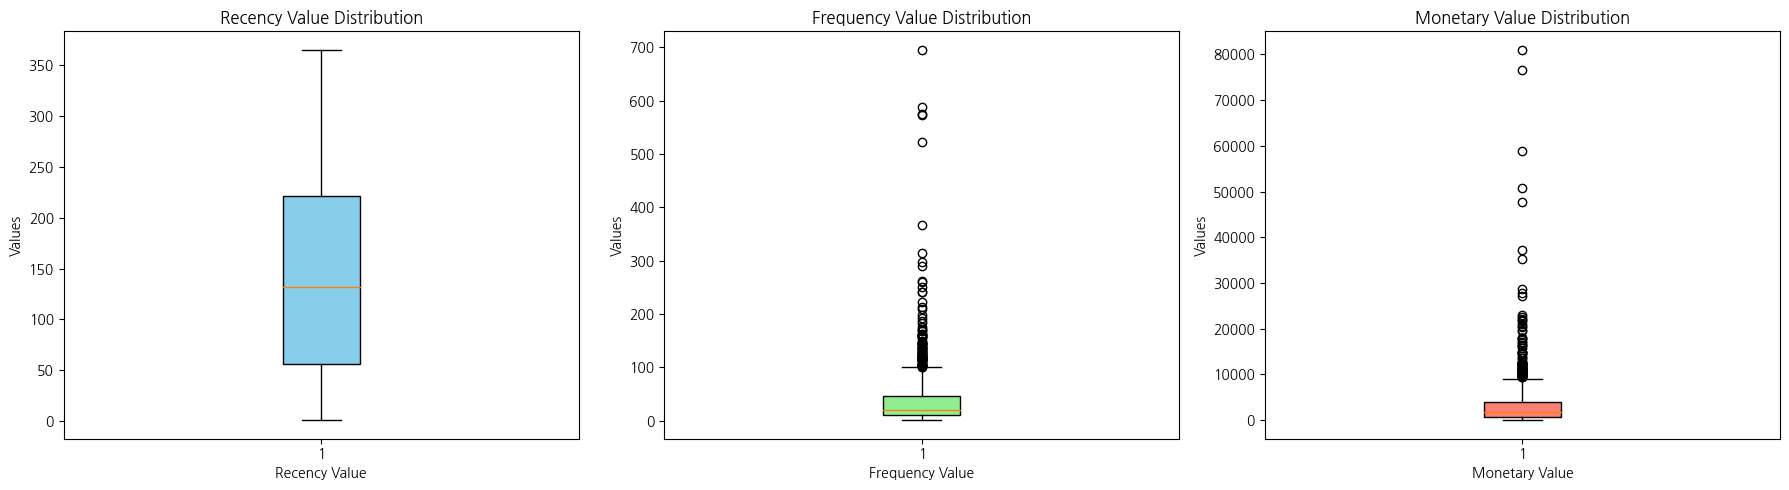

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
box1 = plt.boxplot(RFM['Recency'], patch_artist=True)
plt.title('Recency Value Distribution')
plt.xlabel('Recency Value')
for patch in box1['boxes']:
    patch.set_facecolor('skyblue')
plt.ylabel('Values')

plt.subplot(1, 3, 2)
box2 = plt.boxplot(RFM['Frequency'], patch_artist=True)
plt.title('Frequency Value Distribution')
plt.xlabel('Frequency Value')
for patch in box2['boxes']:
    patch.set_facecolor('lightgreen')
plt.ylabel('Values')

plt.subplot(1, 3, 3)
box3 = plt.boxplot(RFM['Monetary'], patch_artist=True)
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
for patch in box3['boxes']:
    patch.set_facecolor('salmon')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

In [ ]:
RFM.describe()

,Recency,Frequency,Monetary
count,1468.000000,1468.000000,1468.000000
mean,145.292234,36.051771,3276.648199
std,101.936959,50.885680,5247.789170
min,1.000000,1.000000,0.990000
25%,56.000000,10.000000,672.324360
50%,132.000000,21.000000,1796.655780
75%,221.000000,46.000000,4065.805143
max,365.000000,695.000000,80979.003040


In [ ]:
fre75 = RFM['Frequency'].quantile(0.75)
fre50 = RFM['Frequency'].quantile(0.50)
fre25 = RFM['Frequency'].quantile(0.25)
fre_iqr = fre75-fre25

non_outlier_max = fre75 + 1.5*fre_iqr
non_outlier_min = 0


non_outlier_max, fre25, fre50, fre75

(100.0, 10.0, 21.0, 46.0)

In [ ]:
fre_max = RFM['Frequency'].max()
fre_max

695

In [ ]:
df1 = RFM[RFM['Frequency']<=non_outlier_max]

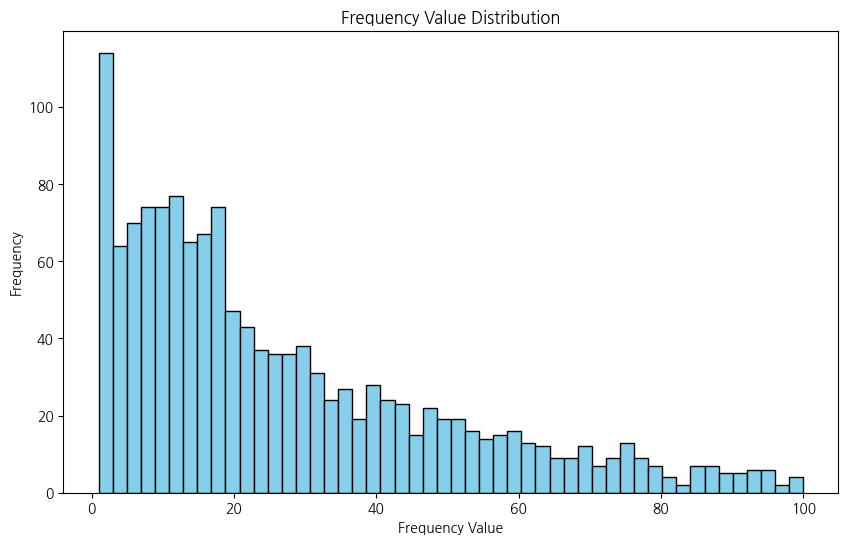

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df1['Frequency'], bins=50, color='skyblue', edgecolor='black')
plt.title('Frequency Value Distribution')
plt.xlabel('Frequency Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
section1 = RFM[(RFM['Frequency'] >= 0) & (RFM['Frequency'] < fre25)].shape[0]
section2 = RFM[(RFM['Frequency'] >= fre25) & (RFM['Frequency'] < fre50)].shape[0]
section3 = RFM[(RFM['Frequency'] >=fre50) & (RFM['Frequency'] < non_outlier_max)].shape[0]
section4 = RFM[(RFM['Frequency'] >= non_outlier_max)].shape[0]
section1, section2, section3, section4

(359, 367, 648, 94)

- Frequency :
  - 최소값 1 ~ < 25% 값 : 1
  - 25% ~ 50% 값 : 2
  - 50% ~ non_outlier_max값 : 3
  - non_outlier_max 보다 큰 값 (이상치 값) : 4

In [ ]:
RFM.describe()

,Recency,Frequency,Monetary
count,1468.000000,1468.000000,1468.000000
mean,145.292234,36.051771,3276.648199
std,101.936959,50.885680,5247.789170
min,1.000000,1.000000,0.990000
25%,56.000000,10.000000,672.324360
50%,132.000000,21.000000,1796.655780
75%,221.000000,46.000000,4065.805143
max,365.000000,695.000000,80979.003040


In [ ]:
mon75 = RFM['Monetary'].quantile(0.75)
mon50 = RFM['Monetary'].quantile(0.50)
mon25 = RFM['Monetary'].quantile(0.25)
mon_iqr = mon75-mon25

mon_outlier_max = mon75 + 1.5*mon_iqr
mon_outlier_min = 0


mon_outlier_max, mon25, mon50, mon75

(9156.026316250001, 672.3243600000001, 1796.65578, 4065.8051425000003)

In [ ]:
RFM[RFM['Monetary']>=mon_outlier_max].shape[0]

100

In [ ]:
mon_max = RFM['Monetary'].max()
mon_max

80979.00304

In [ ]:
mon_section1 = RFM[(RFM['Monetary'] >= 0) & (RFM['Monetary'] < mon25)].shape[0]
mon_section2 = RFM[(RFM['Monetary'] >= mon25) & (RFM['Monetary'] < mon50)].shape[0]
mon_section3 = RFM[(RFM['Monetary'] >= mon50) & (RFM['Monetary'] < mon_outlier_max)].shape[0]
mon_section4 = RFM[(RFM['Monetary'] >= mon_outlier_max)].shape[0]
mon_section1, mon_section2, mon_section3, mon_section4

(367, 367, 634, 100)

- Monetary :
  - 최소값 1 ~ < 25% 값 : 1
  - 25% ~ 50% 값 : 2
  - 50% ~ mon_outlier_max값 : 3
  - mon_outlier_max 보다 큰 값 (이상치 값) : 4

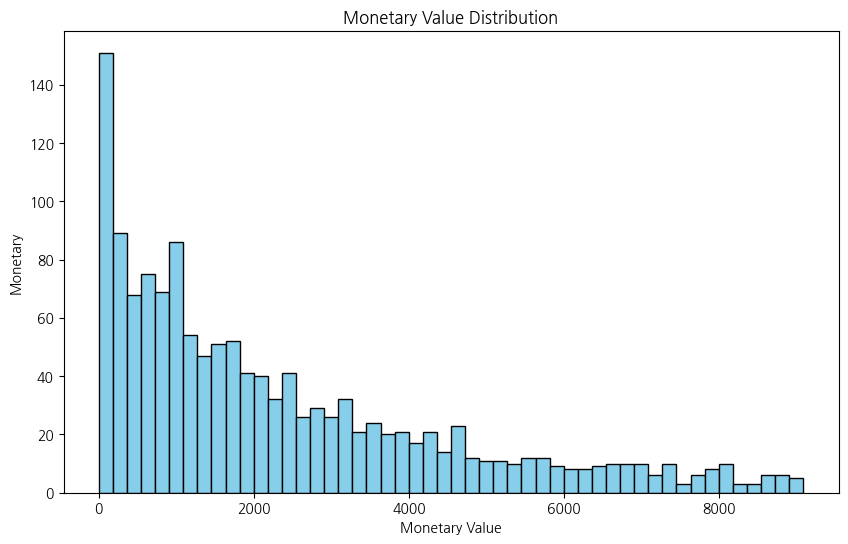

In [ ]:
df2 = RFM[RFM['Monetary']<mon_outlier_max]
plt.figure(figsize=(10, 6))
plt.hist(df2['Monetary'], bins=50, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Monetary')
plt.show()

In [ ]:
recency_bins, recency_bin_edges = pd.qcut(RFM['Recency'], q=4, labels=False, retbins=True)
print("Recency 열의 4구간 경계값:")
print(recency_bin_edges)

Recency 열의 4구간 경계값:
[  1.  56. 132. 221. 365.]


In [ ]:
RFM['Recency_Score'] = pd.qcut(RFM['Recency'], q=4, labels=False) + 1
recency_labels = ['4', '3', '2', '1']  # 1이 가장 최근, 4가 가장 오래됨
RFM['Recency_Label'] = RFM['Recency_Score'].map(lambda x: recency_labels[x-1]).astype(int)

In [ ]:
RFM

,고객ID,Recency,Frequency,Monetary,Recency_Score,Recency_Label
0,USER_0000,108,2,24.98174,2,3
1,USER_0001,60,60,14997.08596,2,3
2,USER_0002,74,23,1492.40594,2,3
3,USER_0003,18,17,1339.55528,1,4
4,USER_0004,108,36,1369.93900,2,3
...,...,...,...,...,...,...
1463,USER_1463,271,7,561.59980,4,1
1464,USER_1464,88,40,2328.89972,2,3
1465,USER_1465,195,8,115.40750,3,2
1466,USER_1466,70,1,327.80000,2,3


In [ ]:
RFM.drop(columns=['Recency_Score'], inplace=True)
RFM

,고객ID,Recency,Frequency,Monetary,Recency_Label
0,USER_0000,108,2,24.98174,3
1,USER_0001,60,60,14997.08596,3
2,USER_0002,74,23,1492.40594,3
3,USER_0003,18,17,1339.55528,4
4,USER_0004,108,36,1369.93900,3
...,...,...,...,...,...
1463,USER_1463,271,7,561.59980,1
1464,USER_1464,88,40,2328.89972,3
1465,USER_1465,195,8,115.40750,2
1466,USER_1466,70,1,327.80000,3


In [ ]:
RFM = RFM.rename(columns={'Recency_Label': 'Recency_Score'})
RFM

,고객ID,Recency,Frequency,Monetary,Recency_Score
0,USER_0000,108,2,24.98174,3
1,USER_0001,60,60,14997.08596,3
2,USER_0002,74,23,1492.40594,3
3,USER_0003,18,17,1339.55528,4
4,USER_0004,108,36,1369.93900,3
...,...,...,...,...,...
1463,USER_1463,271,7,561.59980,1
1464,USER_1464,88,40,2328.89972,3
1465,USER_1465,195,8,115.40750,2
1466,USER_1466,70,1,327.80000,3


In [ ]:
RFM['Frequency_Score'] = pd.cut(RFM['Frequency'],bins=[0,fre25, fre50, non_outlier_max,fre_max],labels=[1,2,3,4],right=False)
RFM['Monetary_Score'] = pd.cut(RFM['Monetary'],bins=[0, mon25, mon50, mon_outlier_max, mon_max],labels=[1,2,3,4],right=False)
RFM

,고객ID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
0,USER_0000,108,2,24.98174,3,1,1
1,USER_0001,60,60,14997.08596,3,3,4
2,USER_0002,74,23,1492.40594,3,3,2
3,USER_0003,18,17,1339.55528,4,2,2
4,USER_0004,108,36,1369.93900,3,3,2
...,...,...,...,...,...,...,...
1463,USER_1463,271,7,561.59980,1,1,1
1464,USER_1464,88,40,2328.89972,3,3,3
1465,USER_1465,195,8,115.40750,2,1,1
1466,USER_1466,70,1,327.80000,3,1,1


In [ ]:
RFM.isnull().sum()

고객ID               0
Recency            0
Frequency          0
Monetary           0
Recency_Score      0
Frequency_Score    1
Monetary_Score     1
dtype: int64

In [ ]:
RFM[RFM['Frequency_Score'].isnull()]

,고객ID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
118,USER_0118,108,695,76634.68266,3,NaN,4


In [ ]:
RFM['Frequency_Score'] = RFM['Frequency_Score'].fillna(4)

In [ ]:
RFM[RFM['Monetary_Score'].isnull()]

,고객ID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
736,USER_0736,13,587,80979.00304,4,4,NaN


In [ ]:
RFM['Monetary_Score'] = RFM['Monetary_Score'].fillna(4)

In [ ]:
RFM.isnull().sum()

고객ID               0
Recency            0
Frequency          0
Monetary           0
Recency_Score      0
Frequency_Score    0
Monetary_Score     0
dtype: int64

In [ ]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   고객ID             1468 non-null   object  
 1   Recency          1468 non-null   int64   
 2   Frequency        1468 non-null   int64   
 3   Monetary         1468 non-null   float64 
 4   Recency_Score    1468 non-null   int64   
 5   Frequency_Score  1468 non-null   category
 6   Monetary_Score   1468 non-null   category
dtypes: category(2), float64(1), int64(3), object(1)
memory usage: 72.1+ KB


In [ ]:
RFM['Frequency_Score'] = RFM['Frequency_Score'].cat.codes.astype(int)
RFM['Monetary_Score'] = RFM['Monetary_Score'].cat.codes.astype(int)
RFM['Frequency_Score'] = RFM['Frequency_Score'] + 1
RFM['Monetary_Score'] = RFM['Monetary_Score'] + 1

RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   고객ID             1468 non-null   object 
 1   Recency          1468 non-null   int64  
 2   Frequency        1468 non-null   int64  
 3   Monetary         1468 non-null   float64
 4   Recency_Score    1468 non-null   int64  
 5   Frequency_Score  1468 non-null   int64  
 6   Monetary_Score   1468 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 91.8+ KB


In [ ]:
def assign_customer_segment(row):
    if row['Recency_Score'] <=2 and row['Frequency_Score'] >= 3 and row['Monetary_Score'] >= 3:
        return '로열 고객'
    elif row['Recency_Score'] >=3 and row['Frequency_Score'] <= 2 and row['Monetary_Score'] <= 2:
        return '저성과 고객'
    elif row['Recency_Score'] >=3 and row['Frequency_Score'] <= 2 and row['Monetary_Score'] >= 3:
        return '고성과 고객'
    else:
        return '범용 고객'

RFM['고객등급'] = RFM.apply(assign_customer_segment, axis=1)

RFM.head(5)

,고객ID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,고객등급
0,USER_0000,108,2,24.98174,3,1,1,저성과 고객
1,USER_0001,60,60,14997.08596,3,3,4,범용 고객
2,USER_0002,74,23,1492.40594,3,3,2,범용 고객
3,USER_0003,18,17,1339.55528,4,2,2,저성과 고객
4,USER_0004,108,36,1369.93900,3,3,2,범용 고객


In [ ]:
RFM['Frequency_Score'].unique(), RFM['Monetary_Score'].unique()

(array([1, 3, 2, 4]), array([1, 4, 2, 3]))

In [ ]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 0 to 1467
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   고객ID             1468 non-null   object 
 1   Recency          1468 non-null   int64  
 2   Frequency        1468 non-null   int64  
 3   Monetary         1468 non-null   float64
 4   Recency_Score    1468 non-null   int64  
 5   Frequency_Score  1468 non-null   int64  
 6   Monetary_Score   1468 non-null   int64  
 7   고객등급             1468 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 103.2+ KB


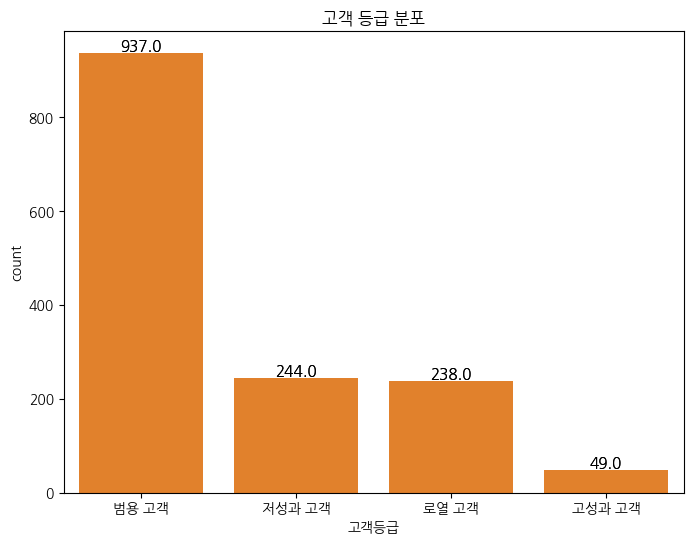

In [ ]:
customer_segment_counts = RFM['고객등급'].value_counts()
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=RFM, x='고객등급', order=customer_segment_counts.index)

sns.countplot(data=RFM, x='고객등급', order=customer_segment_counts.index)
plt.title('고객 등급 분포')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

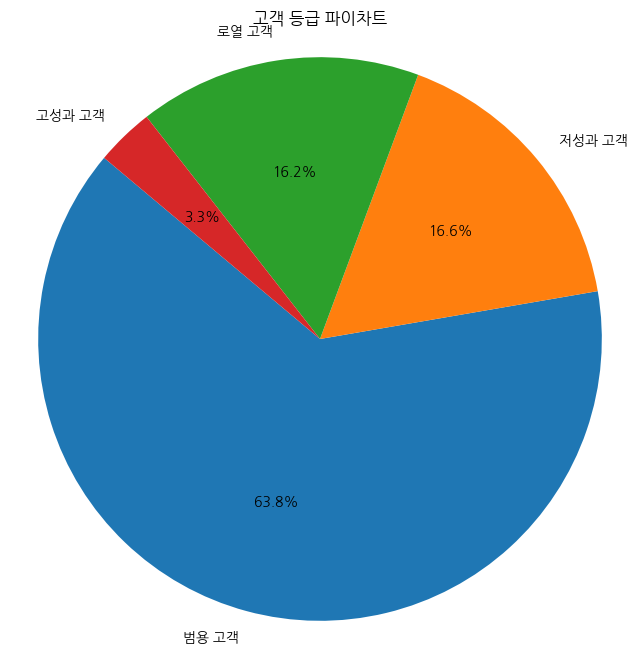

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(customer_segment_counts, labels=customer_segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('고객 등급 파이차트')
plt.axis('equal')
plt.show()

In [ ]:
customer_segment_counts

범용 고객     937
저성과 고객    244
로열 고객     238
고성과 고객     49
Name: 고객등급, dtype: int64

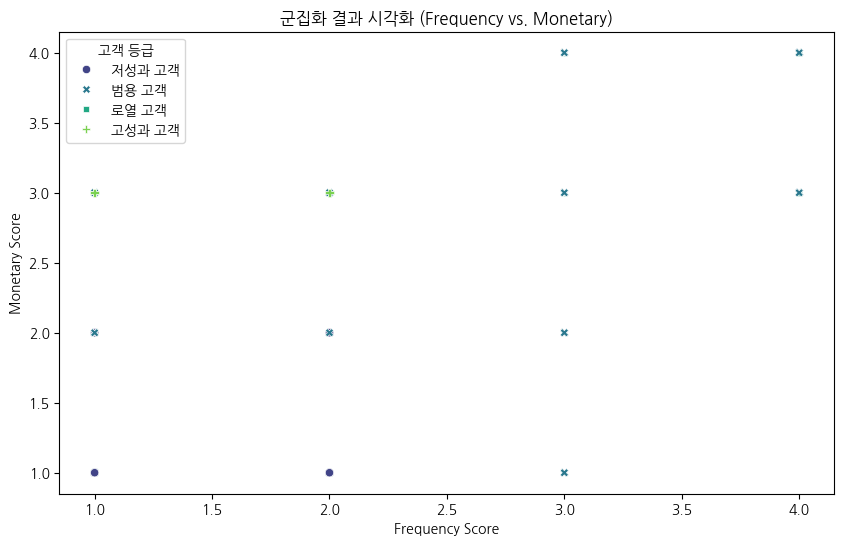

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=RFM, x='Frequency_Score', y='Monetary_Score', hue='고객등급', palette='viridis', style='고객등급')
plt.title('군집화 결과 시각화 (Frequency vs. Monetary)')
plt.xlabel('Frequency Score')
plt.ylabel('Monetary Score')
plt.legend(title='고객 등급')
plt.show()

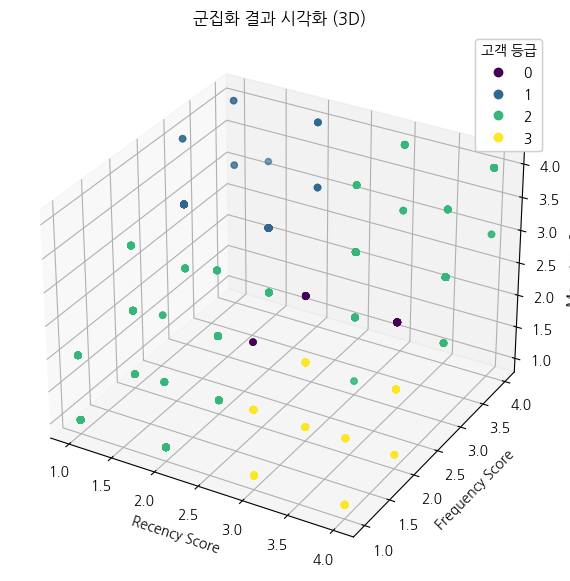

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D 산점도를 그립니다. Recency_Score, Frequency_Score, Monetary_Score를 사용합니다.
scatter = ax.scatter(RFM['Recency_Score'], RFM['Frequency_Score'], RFM['Monetary_Score'],
                     c=RFM['고객등급'].astype('category').cat.codes, cmap='viridis')

# 고객등급별로 범례를 만듭니다.
legend1 = ax.legend(*scatter.legend_elements(), title="고객 등급")
ax.add_artist(legend1)

# 축 이름을 지정합니다.
ax.set_xlabel('Recency Score')
ax.set_ylabel('Frequency Score')
ax.set_zlabel('Monetary Score')
ax.set_title('군집화 결과 시각화 (3D)')

plt.show()

In [ ]:
RFM.to_csv('rfm.csv',index=False)

# GMM

## 스케일링

In [ ]:
df3 = RFM.copy()
df3.head(3)

,고객ID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,고객등급
0,USER_0000,108,2,24.98174,3,1,1,저성과 고객
1,USER_0001,60,60,14997.08596,3,3,4,범용 고객
2,USER_0002,74,23,1492.40594,3,3,2,범용 고객


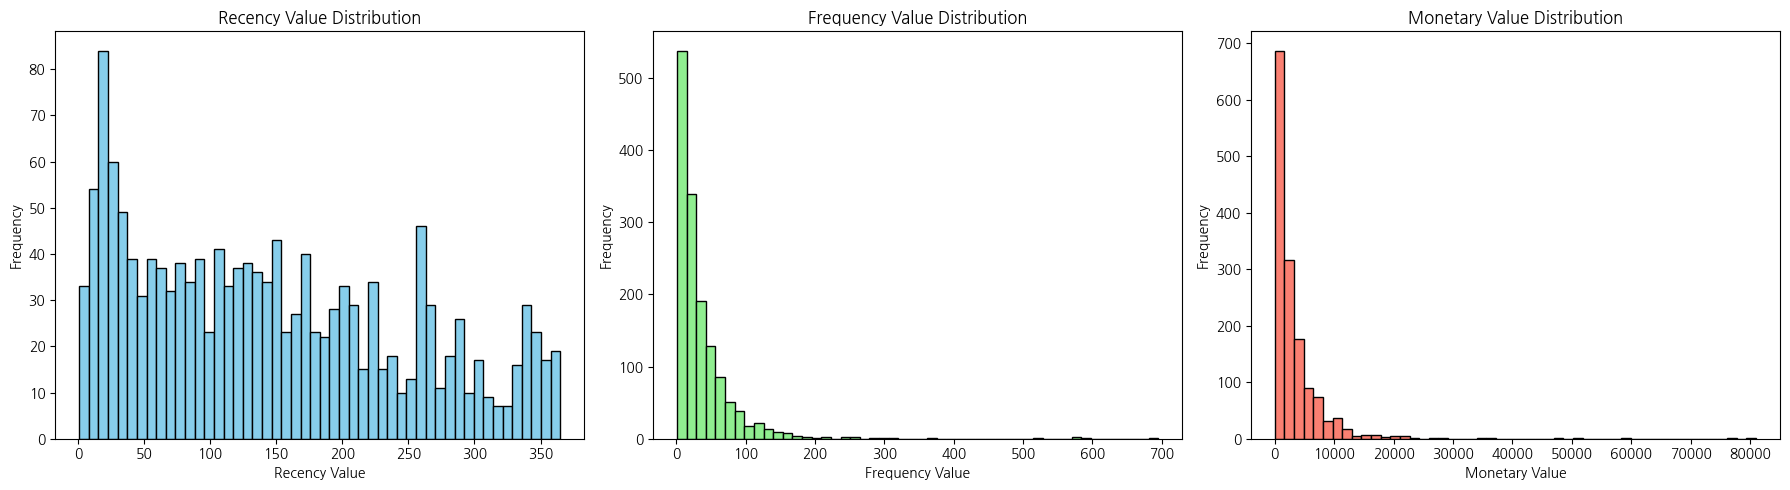

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(df3['Recency'], bins=50, color='skyblue', edgecolor='black')
plt.title('Recency Value Distribution')
plt.xlabel('Recency Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df3['Frequency'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Frequency Value Distribution')
plt.xlabel('Frequency Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df3['Monetary'], bins=50, color='salmon', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

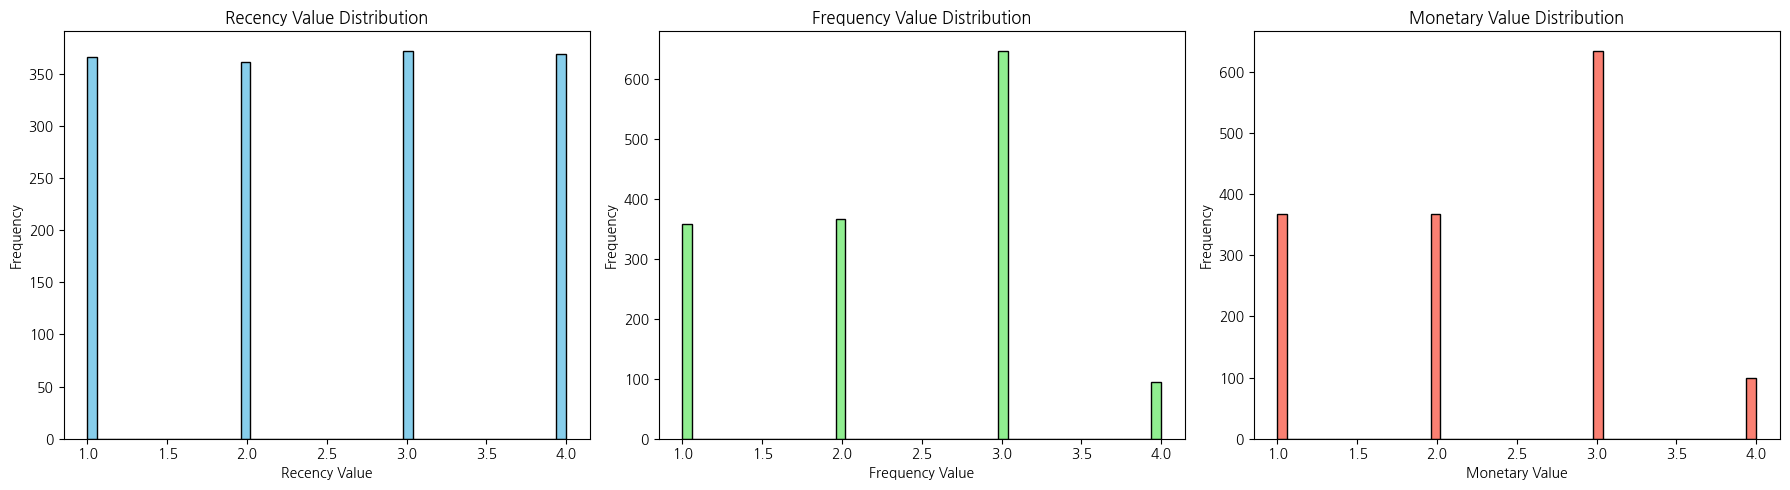

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(df3['Recency_Score'], bins=50, color='skyblue', edgecolor='black')
plt.title('Recency Value Distribution')
plt.xlabel('Recency Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df3['Frequency_Score'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Frequency Value Distribution')
plt.xlabel('Frequency Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df3['Monetary_Score'], bins=50, color='salmon', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
df4 = df3[['고객ID','Recency','Frequency','Monetary']]
df4.set_index("고객ID", inplace=True)
df4.head(3)

,Recency,Frequency,Monetary
고객ID,,,
USER_0000,108,2,24.98174
USER_0001,60,60,14997.08596
USER_0002,74,23,1492.40594


### Robust

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(df4)

In [ ]:
scaled_df = pd.DataFrame(scaled_data, columns=df4.columns)
scaled_df

,Recency,Frequency,Monetary
0,-0.145455,-0.527778,-0.522082
1,-0.436364,1.083333,3.889938
2,-0.351515,0.055556,-0.089657
3,-0.690909,-0.111111,-0.134700
4,-0.145455,0.416667,-0.125746
...,...,...,...
1463,0.842424,-0.388889,-0.363950
1464,-0.266667,0.527778,0.156843
1465,0.381818,-0.361111,-0.495435
1466,-0.375758,-0.555556,-0.432846


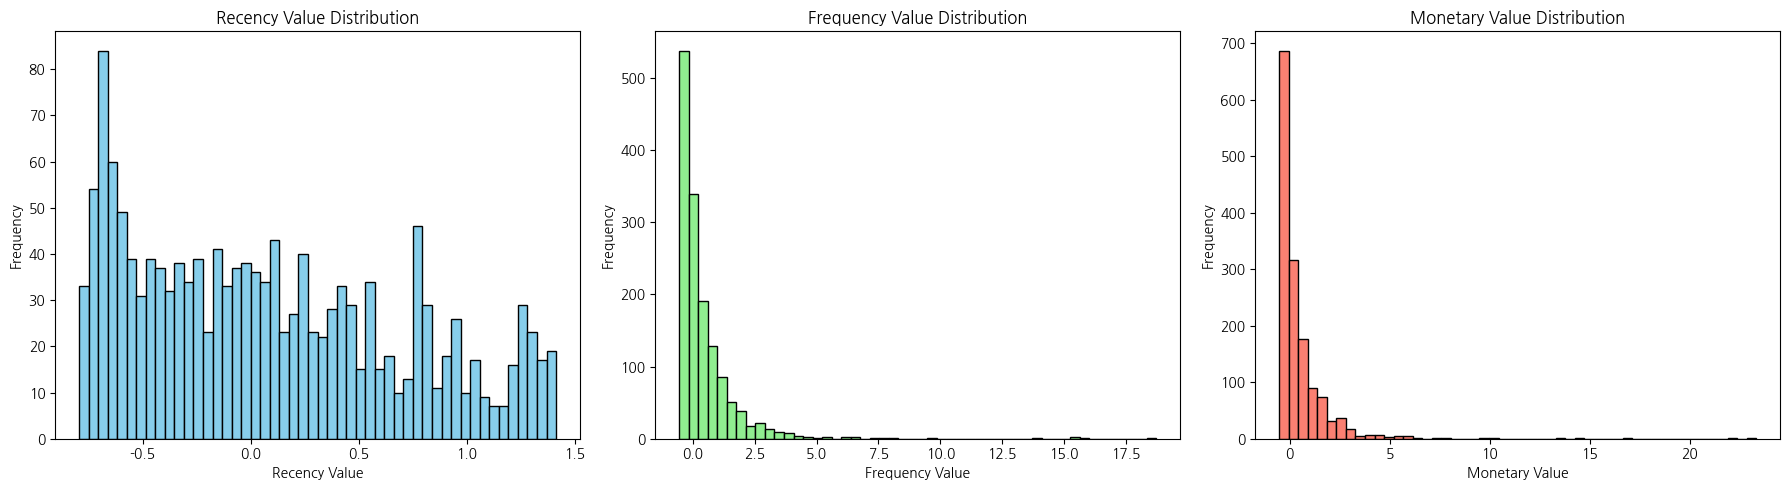

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(scaled_df['Recency'], bins=50, color='skyblue', edgecolor='black')
plt.title('Recency Value Distribution')
plt.xlabel('Recency Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(scaled_df['Frequency'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Frequency Value Distribution')
plt.xlabel('Frequency Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(scaled_df['Monetary'], bins=50, color='salmon', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
robust = scaled_df.copy()

### log

In [ ]:
log = df4.copy()
log['Recency_Log'] = np.log(log['Recency'])
log['Frequency_Log'] = np.log(log['Frequency'])
log['Monetary_Log'] = np.log(log['Monetary'])
log.head(3)

,Recency,Frequency,Monetary,Recency_Log,Frequency_Log,Monetary_Log
고객ID,,,,,,
USER_0000,108,2,24.98174,4.682131,0.693147,3.218145
USER_0001,60,60,14997.08596,4.094345,4.094345,9.615611
USER_0002,74,23,1492.40594,4.304065,3.135494,7.308145


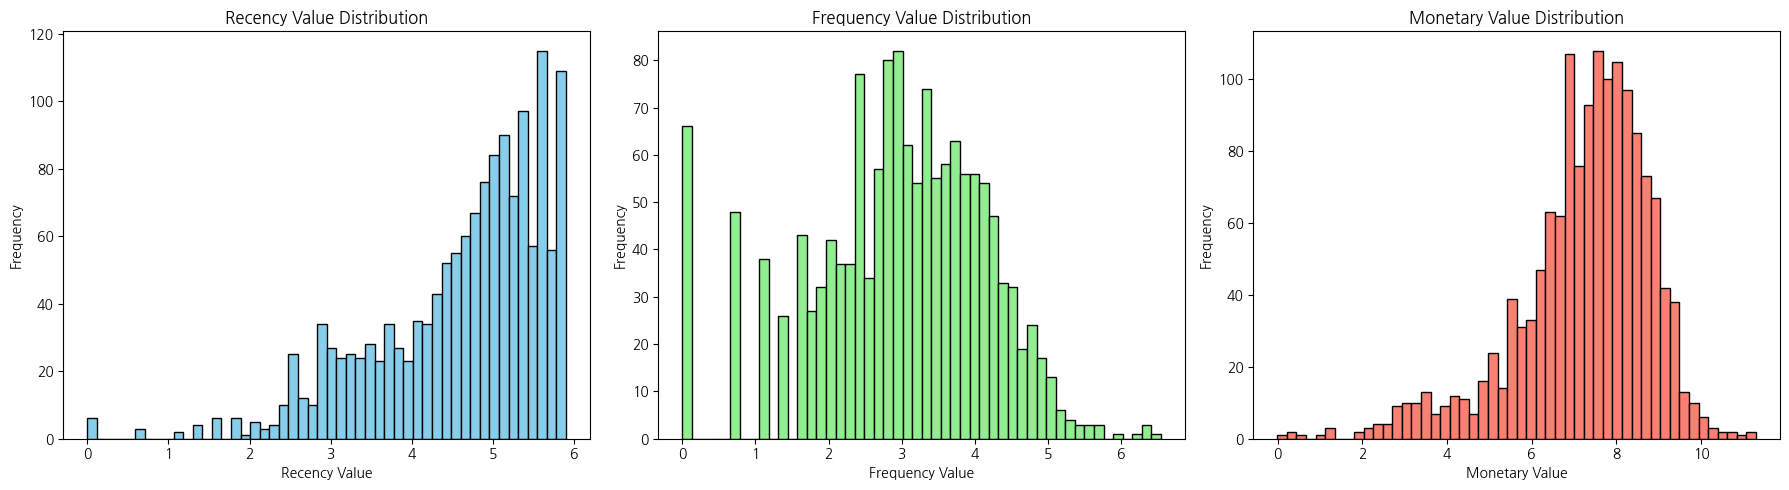

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(log['Recency_Log'], bins=50, color='skyblue', edgecolor='black')
plt.title('Recency Value Distribution')
plt.xlabel('Recency Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(log['Frequency_Log'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Frequency Value Distribution')
plt.xlabel('Frequency Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(log['Monetary_Log'], bins=50, color='salmon', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### boxcox

In [ ]:
boxcox = df4.copy()
boxcox

,Recency,Frequency,Monetary
고객ID,,,
USER_0000,108,2,24.98174
USER_0001,60,60,14997.08596
USER_0002,74,23,1492.40594
USER_0003,18,17,1339.55528
USER_0004,108,36,1369.93900
...,...,...,...
USER_1463,271,7,561.59980
USER_1464,88,40,2328.89972
USER_1465,195,8,115.40750


In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox', standardize=False)  # standardize=False는 스케일링을 비활성화
boxcox_transformed = pt.fit_transform(boxcox[['Recency', 'Frequency', 'Monetary']])
boxcox_transformed = pd.DataFrame(boxcox_transformed, columns=['Recency_BoxCox', 'Frequency_BoxCox', 'Monetary_BoxCox'])
boxcox_transformed

,Recency_BoxCox,Frequency_BoxCox,Monetary_BoxCox
0,17.077137,0.725639,4.543507
1,12.442647,5.420354,29.822125
2,13.951504,3.878680,16.813773
3,6.147676,3.431513,16.341581
4,17.077137,4.574935,16.438744
...,...,...,...
1463,27.461703,2.216840,12.897546
1464,15.315312,4.744700,18.871589
1465,23.222357,2.390723,7.996739
1466,13.537113,0.000000,11.050414


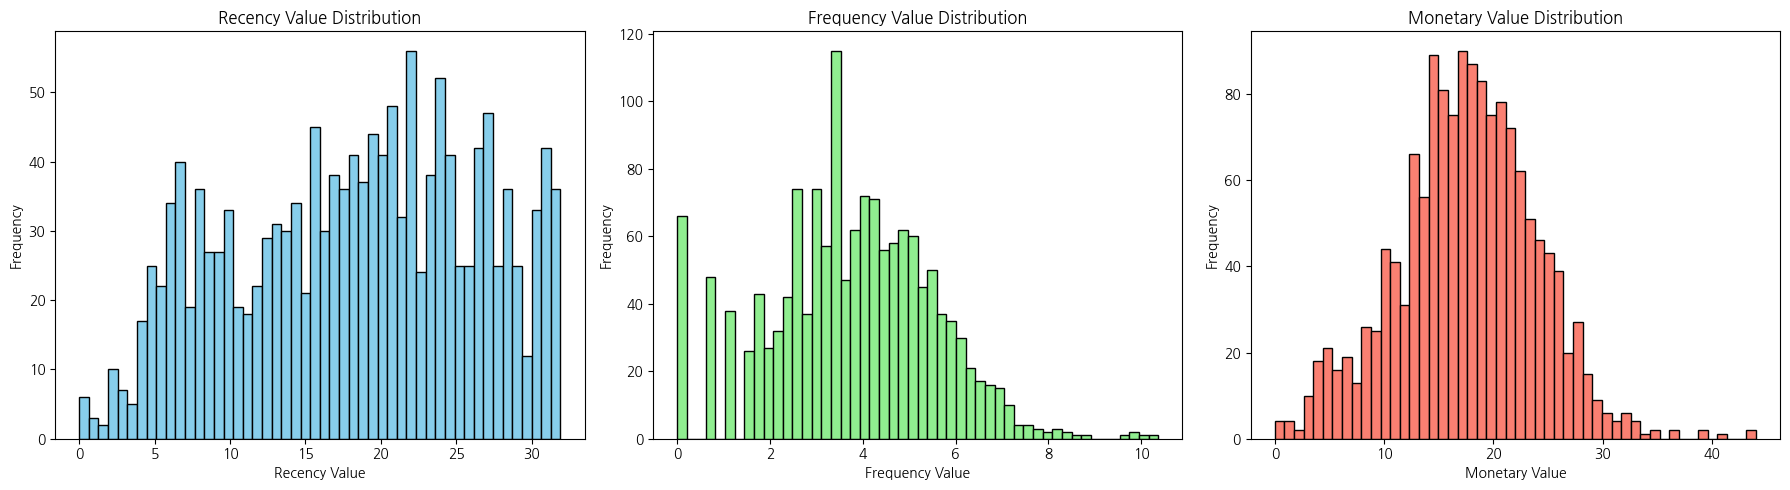

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(boxcox_transformed['Recency_BoxCox'], bins=50, color='skyblue', edgecolor='black')
plt.title('Recency Value Distribution')
plt.xlabel('Recency Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(boxcox_transformed['Frequency_BoxCox'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Frequency Value Distribution')
plt.xlabel('Frequency Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(boxcox_transformed['Monetary_BoxCox'], bins=50, color='salmon', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 모델학습

- 일반

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(df4)

labels = gmm.predict(df4)
df4['Cluster'] = labels

df4.head(3)

<ipython-input-207-bfd14769f9f9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Cluster'] = labels


,Recency,Frequency,Monetary,Cluster
고객ID,,,,
USER_0000,108,2,24.98174,0
USER_0001,60,60,14997.08596,2
USER_0002,74,23,1492.40594,0


In [ ]:
df4['Cluster'].unique()

array([0, 2, 3, 1])

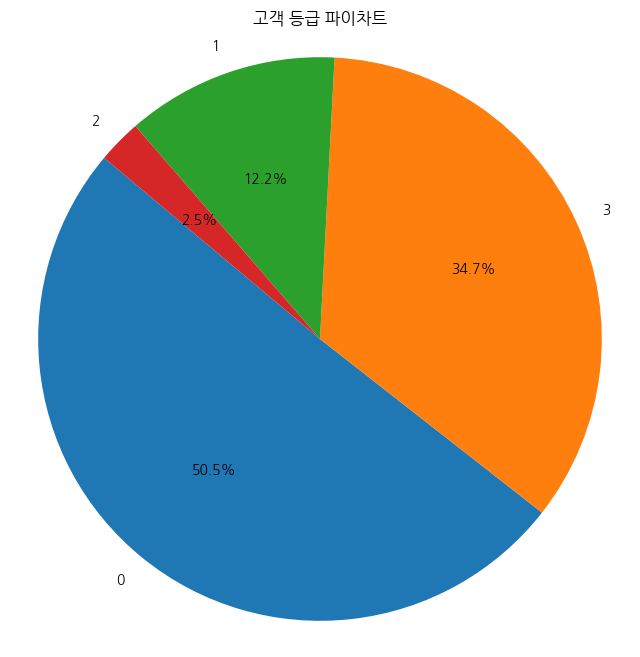

In [ ]:
plot = df4['Cluster'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(plot, labels=plot.index, autopct='%1.1f%%', startangle=140)
plt.title('고객 등급 파이차트')
plt.axis('equal')
plt.show()

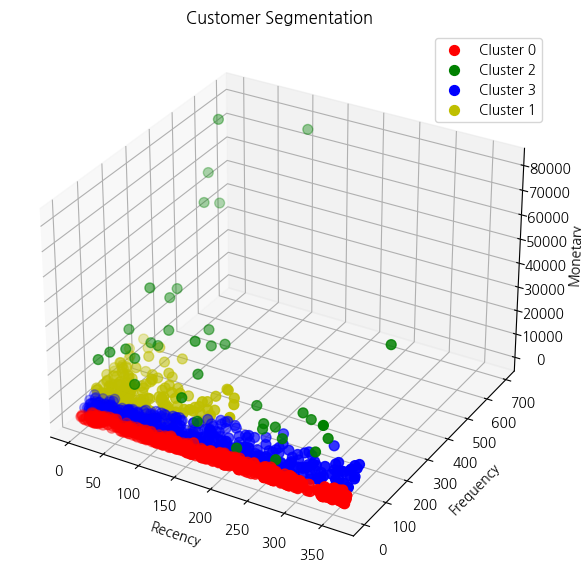

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 군집별로 색상을 다르게 하여 3D 산점도 그림
clusters = df4['Cluster'].unique()
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'black', 'grey', 'purple']

for cluster, color in zip(clusters, colors):
    # 군집별 데이터 선택
    cluster_data = df4[df4['Cluster'] == cluster]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], color=color, label=f'Cluster {cluster}', s=50)

# 축 레이블 설정
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# 그래프 제목 및 범례 설정
ax.set_title('Customer Segmentation')
ax.legend()

# 그래프 표시
plt.show()

- robust

In [ ]:
robust.head(3)

,Recency,Frequency,Monetary
0,-0.145455,-0.527778,-0.522082
1,-0.436364,1.083333,3.889938
2,-0.351515,0.055556,-0.089657


In [ ]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(robust)

labels = gmm.predict(robust)
robust['Cluster'] = labels

robust.head(3)

,Recency,Frequency,Monetary,Cluster
0,-0.145455,-0.527778,-0.522082,3
1,-0.436364,1.083333,3.889938,1
2,-0.351515,0.055556,-0.089657,3


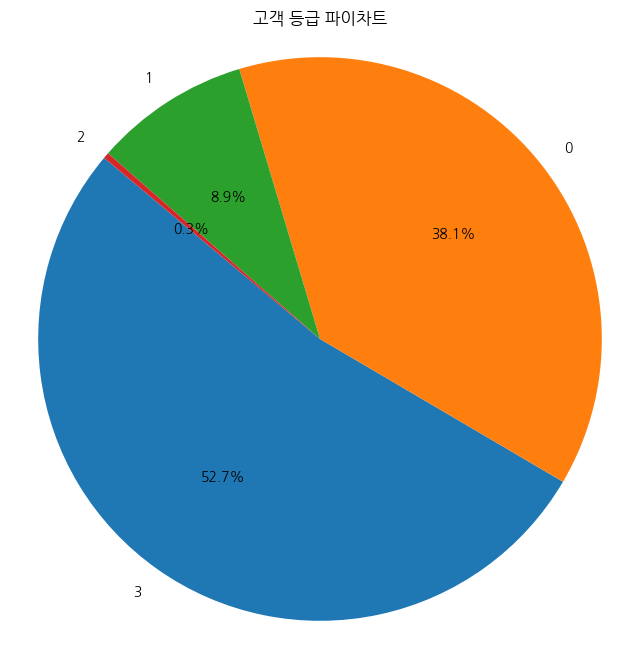

In [ ]:
plot = robust['Cluster'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(plot, labels=plot.index, autopct='%1.1f%%', startangle=140)
plt.title('고객 등급 파이차트')
plt.axis('equal')
plt.show()

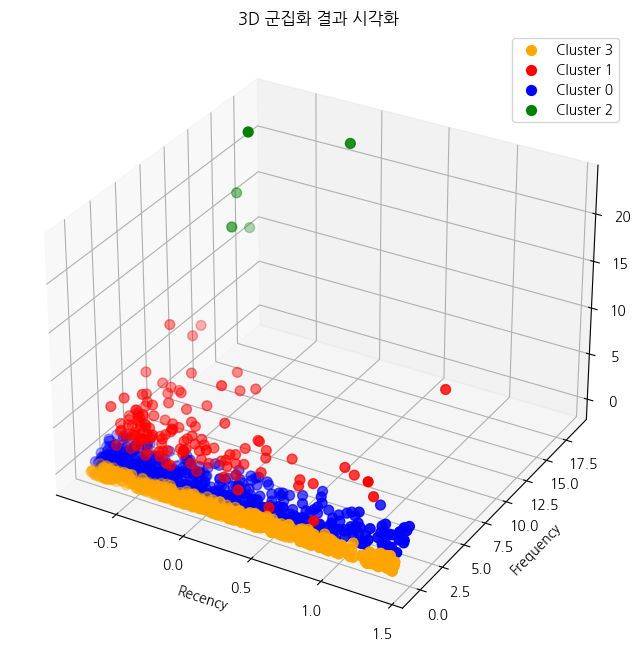

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 각 군집별로 다른 색상으로 3D 산점도를 그림
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
cluster_labels = robust['Cluster'].unique()
for cluster in cluster_labels:
    # 군집별 데이터 선택
    cluster_data = robust[robust['Cluster'] == cluster]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], s=50, label=f'Cluster {cluster}', c=colors[cluster])

# 축 레이블 설정
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# 범례 추가
ax.legend()

# 그래프 제목 설정
ax.set_title('3D 군집화 결과 시각화')

# 그래프 표시
plt.show()

- log

In [ ]:
log.head(3)

,Recency,Frequency,Monetary,Recency_Log,Frequency_Log,Monetary_Log
고객ID,,,,,,
USER_0000,108,2,24.98174,4.682131,0.693147,3.218145
USER_0001,60,60,14997.08596,4.094345,4.094345,9.615611
USER_0002,74,23,1492.40594,4.304065,3.135494,7.308145


In [ ]:
log2 = log[['Recency_Log','Frequency_Log','Monetary_Log']]
log2.head(3)

,Recency_Log,Frequency_Log,Monetary_Log
고객ID,,,
USER_0000,4.682131,0.693147,3.218145
USER_0001,4.094345,4.094345,9.615611
USER_0002,4.304065,3.135494,7.308145


In [ ]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(log2)

labels = gmm.predict(log2)
log2['Cluster'] = labels

log2.head(3)

<ipython-input-215-01849af62b0f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log2['Cluster'] = labels


,Recency_Log,Frequency_Log,Monetary_Log,Cluster
고객ID,,,,
USER_0000,4.682131,0.693147,3.218145,2
USER_0001,4.094345,4.094345,9.615611,1
USER_0002,4.304065,3.135494,7.308145,3


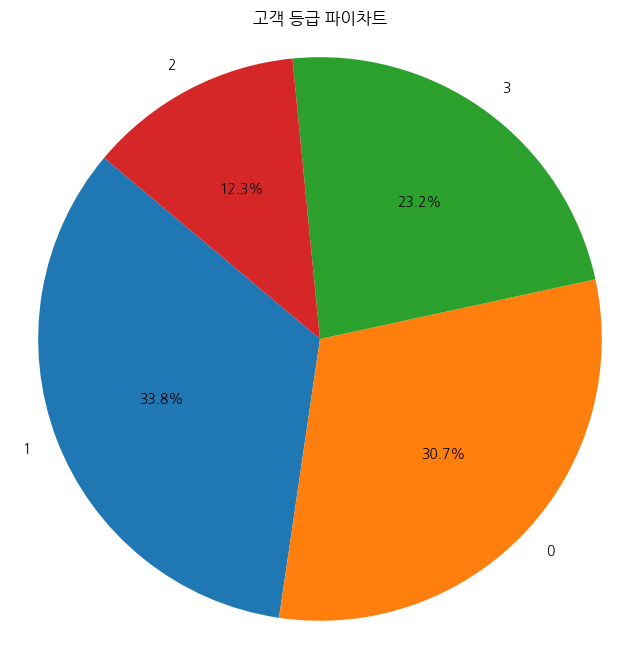

In [ ]:
plot = log2['Cluster'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(plot, labels=plot.index, autopct='%1.1f%%', startangle=140)
plt.title('고객 등급 파이차트')
plt.axis('equal')
plt.show()

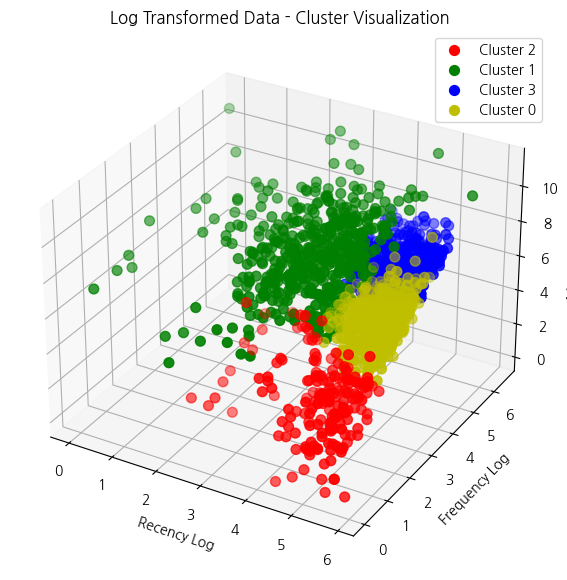

In [ ]:
clusters = log2['Cluster'].unique()

# 새로운 그림 생성
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 각 군집별로 다른 색상으로 3D 산점도를 그림
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'black', 'grey', 'purple']
for cluster, color in zip(clusters, colors):
    # 군집별 데이터 선택
    cluster_data = log2[log2['Cluster'] == cluster]
    ax.scatter(cluster_data['Recency_Log'], cluster_data['Frequency_Log'], cluster_data['Monetary_Log'], color=color, label=f'Cluster {cluster}', s=50)

# 축 레이블 설정
ax.set_xlabel('Recency Log')
ax.set_ylabel('Frequency Log')
ax.set_zlabel('Monetary Log')

# 그래프 제목 및 범례 설정
ax.set_title('Log Transformed Data - Cluster Visualization')
ax.legend()

# 그래프 표시
plt.show()

- boxcox

In [ ]:
boxcox_transformed.head(3)

,Recency_BoxCox,Frequency_BoxCox,Monetary_BoxCox
0,17.077137,0.725639,4.543507
1,12.442647,5.420354,29.822125
2,13.951504,3.878680,16.813773


In [ ]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(boxcox_transformed)

labels = gmm.predict(boxcox_transformed)
boxcox_transformed['Cluster'] = labels

boxcox_transformed.head(3)

,Recency_BoxCox,Frequency_BoxCox,Monetary_BoxCox,Cluster
0,17.077137,0.725639,4.543507,3
1,12.442647,5.420354,29.822125,0
2,13.951504,3.878680,16.813773,2


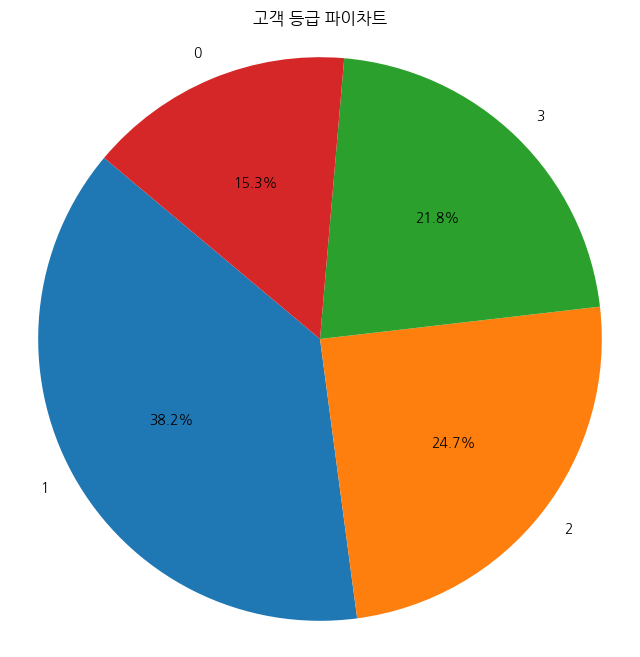

In [ ]:
plot = boxcox_transformed['Cluster'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(plot, labels=plot.index, autopct='%1.1f%%', startangle=140)
plt.title('고객 등급 파이차트')
plt.axis('equal')
plt.show()

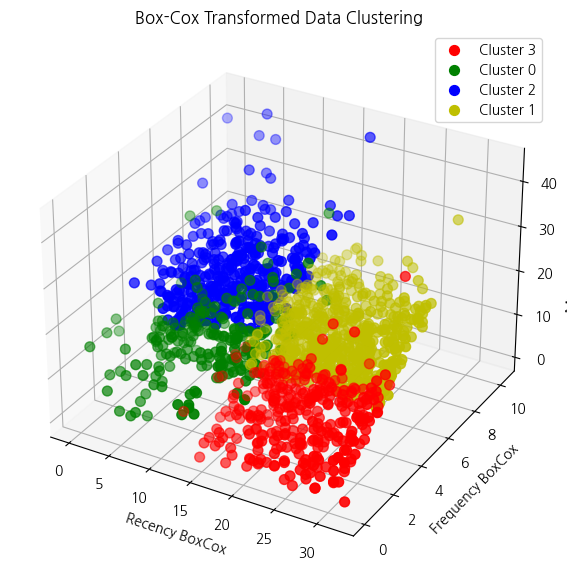

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 군집별로 다른 색상으로 3D 산점도를 그림
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'black', 'grey', 'purple']  # 색상 리스트
clusters = boxcox_transformed['Cluster'].unique()  # 군집 레이블

for cluster, color in zip(clusters, colors):
    # 군집별 데이터 선택
    cluster_data = boxcox_transformed[boxcox_transformed['Cluster'] == cluster]
    ax.scatter(cluster_data['Recency_BoxCox'], cluster_data['Frequency_BoxCox'], cluster_data['Monetary_BoxCox'],
               color=color, label=f'Cluster {cluster}', s=50)

# 축 레이블 설정
ax.set_xlabel('Recency BoxCox')
ax.set_ylabel('Frequency BoxCox')
ax.set_zlabel('Monetary BoxCox')

# 그래프 제목 및 범례 설정
ax.set_title('Box-Cox Transformed Data Clustering')
ax.legend()

# 그래프 표시
plt.show()

## 최적 군집수 구하기

- GMM 알고리즘의 경우 Akaike Information Criterion (AIC) 또는 Bayesian Information Criterion (BIC) 방법으로 최적 군집수 구하는게 좋다.
- GMM이 확률적 모델이기 때문
- AIC, BIC 모두 모델의 복잡성에 대한 벌점을 포함하며, 값이 낮을수록 모델이 데이터에 더 잘 맞는다고 평가한다.
- 모델이 데이터를 얼마나 잘 설명하는지와 군집의 수가 많아질수록 증가하는 모델의 복잡도 사이의 균형을 찾는 데 사용된다.


In [ ]:
RFM = pd.read_csv('rfm.csv')
RFM.head(3)

,고객ID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,고객등급
0,USER_0000,108,2,24.98174,3,1,1,저성과 고객
1,USER_0001,60,60,14997.08596,3,3,4,범용 고객
2,USER_0002,74,23,1492.40594,3,3,2,범용 고객


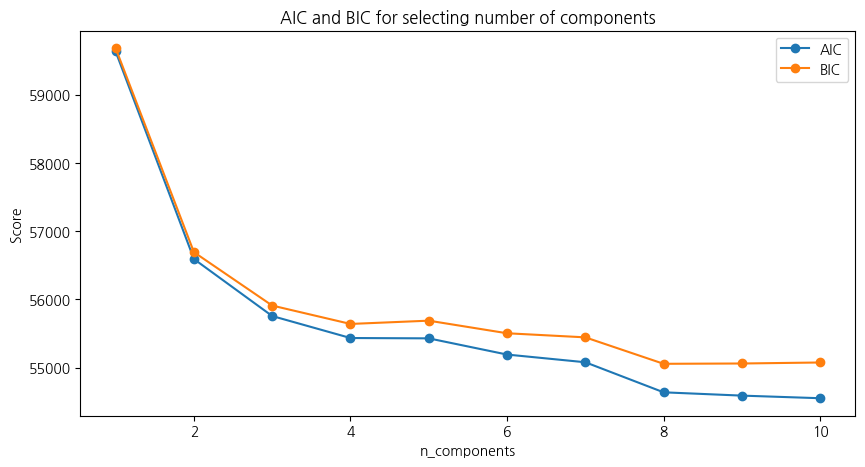

최적의 군집 수 (AIC 기준): 10
최적의 군집 수 (BIC 기준): 8


In [ ]:
from sklearn.mixture import GaussianMixture

X = RFM[['Recency','Frequency','Monetary']]

n_components = np.arange(1, 11)  # 군집 수 범위 설정
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

aic = [m.aic(X) for m in models]
bic = [m.bic(X) for m in models]

plt.figure(figsize=(10, 5))

plt.plot(n_components, aic, label='AIC', marker='o')
plt.plot(n_components, bic, label='BIC', marker='o')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.ylabel('Score')

plt.title('AIC and BIC for selecting number of components')
plt.show()

# 최적 군집 수 출력
optimal_n_components_aic = n_components[np.argmin(aic)]
optimal_n_components_bic = n_components[np.argmin(bic)]
print(f"최적의 군집 수 (AIC 기준): {optimal_n_components_aic}")
print(f"최적의 군집 수 (BIC 기준): {optimal_n_components_bic}")

### AIC
- AIC는 주어진 데이터셋에 대해 상대적으로 더 좋은 모델을 선택하는 데 도움을 준다.
- 모델의 적합도를 강조하며, 때로는 복잡한 모델을 선호할 수 있다.
- 데이터에 대한 모델의 설명력을 최대화하는 데 초점을 맞춘다.  

### BIC
- BIC는 샘플 크기가 클 때 AIC보다 더 많은 벌점을 부여하여 모델의 복잡성을 더 강하게 패널티를 준다.
- 일반적으로 더 단순한 모델을 선호하며, 군집 수가 많은 경우 그에 대한 더 큰 패널티를 부여한다.
- 모델 선택에서 과적합(overfitting)을 방지하는 데 더 효과적일 수 있다.

### 선택 기준
- 일반적인 지침: 만약 군집화를 수행하는 주된 목적이 설명력(모델이 데이터를 얼마나 잘 설명하는지)을 극대화하는 것이라면, AIC가 더 낮은 모델을 선택할 수 있다. 반면, 과적합을 방지하고 더 간결한 모델을 원한다면 BIC가 낮은 모델을 선택하는 것이 좋다.
- 데이터의 크기와 복잡성: 샘플 크기가 매우 크거나 모델의 복잡성(변수의 수)이 높은 경우, BIC를 사용하는 것이 일반적으로 권장된다.
- 목적의 차이: 연구의 목적이나 특정 상황에 따라 선택할 기준이 달라질 수 있다. 예를 들어, 최대한 많은 정보를 추출하려는 연구 목적이라면 AIC를, 보다 간결하고 일반화 가능한 모델을 원한다면 BIC를 선택할 수 있다.

## 최적 군집수 10개로 스케일링 후 모델 학습

In [ ]:
optimizer = RFM[['고객ID','Recency','Frequency','Monetary']]
optimizer.set_index("고객ID", inplace=True)
optimizer.head(3)

,Recency,Frequency,Monetary
고객ID,,,
USER_0000,108,2,24.98174
USER_0001,60,60,14997.08596
USER_0002,74,23,1492.40594


- 스케일링 X

In [ ]:
no_scaling = optimizer.copy()

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=10, random_state=42)
gmm.fit(no_scaling)

labels = gmm.predict(no_scaling)
no_scaling['Cluster'] = labels

no_scaling.head(3)

,Recency,Frequency,Monetary,Cluster
고객ID,,,,
USER_0000,108,2,24.98174,0
USER_0001,60,60,14997.08596,4
USER_0002,74,23,1492.40594,3


<ipython-input-9-2d7ab96ddf1a>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10', 10)


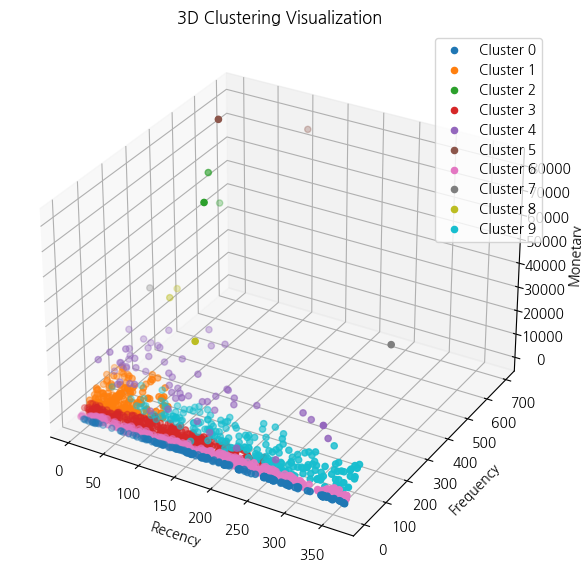

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

colormap = plt.cm.get_cmap('tab10', 10)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(10):
    cluster_data = no_scaling[no_scaling['Cluster'] == cluster]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'],
               color=colormap(cluster), label=f'Cluster {cluster}')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Clustering Visualization')

ax.legend()

plt.show()

- Robust

In [ ]:
robust = optimizer.copy()

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_robust = scaler.fit_transform(robust)

scaled_robust = pd.DataFrame(scaled_robust, columns=robust.columns)
scaled_robust

In [ ]:
gmm = GaussianMixture(n_components=10, random_state=42)
gmm.fit(robust)

labels = gmm.predict(robust)
robust['Cluster'] = labels

robust.head(3)

,Recency,Frequency,Monetary,Cluster
고객ID,,,,
USER_0000,108,2,24.98174,0
USER_0001,60,60,14997.08596,4
USER_0002,74,23,1492.40594,0


<ipython-input-22-0373c50f8e84>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10', 10)


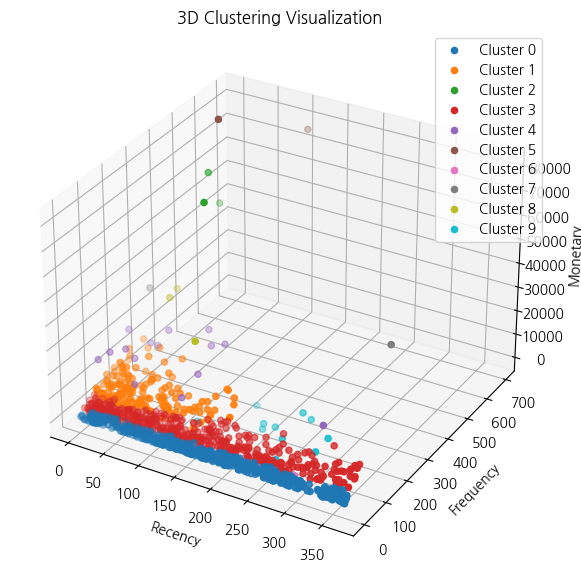

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

colormap = plt.cm.get_cmap('tab10', 10)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(10):
    cluster_data = robust[robust['Cluster'] == cluster]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'],
               color=colormap(cluster), label=f'Cluster {cluster}')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Clustering Visualization')

ax.legend()

plt.show()

- log

In [ ]:
log = optimizer.copy()

log['Recency'] = np.log(log['Recency'])
log['Frequency'] = np.log(log['Frequency'])
log['Monetary'] = np.log(log['Monetary'])

log.head(3)

,Recency,Frequency,Monetary
고객ID,,,
USER_0000,4.682131,0.693147,3.218145
USER_0001,4.094345,4.094345,9.615611
USER_0002,4.304065,3.135494,7.308145


In [ ]:
gmm = GaussianMixture(n_components=10, random_state=42)
gmm.fit(log)

labels = gmm.predict(log)
log['Cluster'] = labels

log.head(3)

,Recency,Frequency,Monetary,Cluster
고객ID,,,,
USER_0000,4.682131,0.693147,3.218145,8
USER_0001,4.094345,4.094345,9.615611,4
USER_0002,4.304065,3.135494,7.308145,5


<ipython-input-23-39710a19b423>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10', 10)


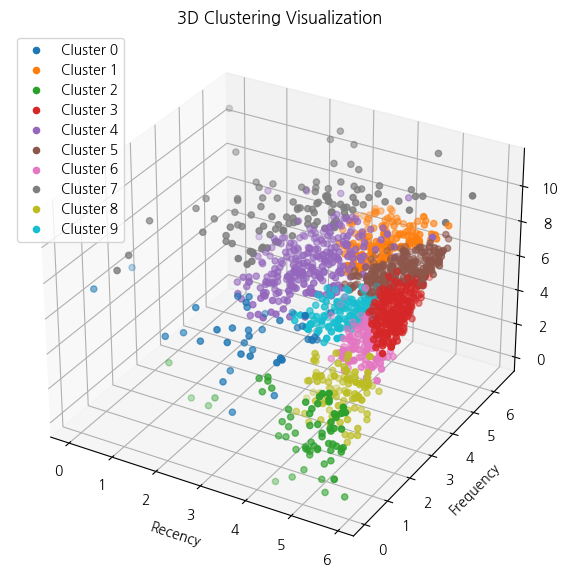

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

colormap = plt.cm.get_cmap('tab10', 10)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(10):
    cluster_data = log[log['Cluster'] == cluster]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'],
               color=colormap(cluster), label=f'Cluster {cluster}')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Clustering Visualization')

ax.legend()

plt.show()

- boxcox

In [ ]:
boxcox = optimizer.copy()

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox', standardize=False)  # standardize=False는 스케일링을 비활성화
boxcox_transformed = pt.fit_transform(boxcox[['Recency', 'Frequency', 'Monetary']])
boxcox_transformed = pd.DataFrame(boxcox_transformed, columns=['Recency_BoxCox', 'Frequency_BoxCox', 'Monetary_BoxCox'])

boxcox_transformed.head(3)

,Recency_BoxCox,Frequency_BoxCox,Monetary_BoxCox
0,17.077137,0.725639,4.543507
1,12.442647,5.420354,29.822125
2,13.951504,3.878680,16.813773


In [ ]:
gmm = GaussianMixture(n_components=10, random_state=42)
gmm.fit(boxcox_transformed)

labels = gmm.predict(boxcox_transformed)
boxcox_transformed['Cluster'] = labels

boxcox_transformed.head(3)

,Recency_BoxCox,Frequency_BoxCox,Monetary_BoxCox,Cluster
0,17.077137,0.725639,4.543507,5
1,12.442647,5.420354,29.822125,4
2,13.951504,3.878680,16.813773,8


<ipython-input-25-acde28634dd0>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10', 10)


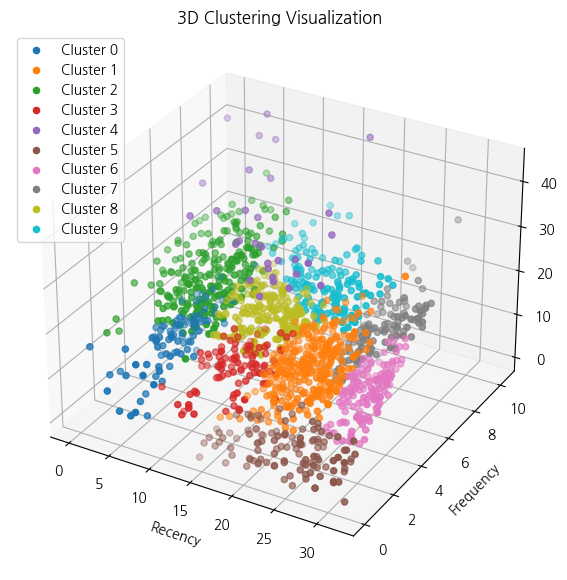

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

colormap = plt.cm.get_cmap('tab10', 10)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(10):
    cluster_data = boxcox_transformed[boxcox_transformed['Cluster'] == cluster]
    ax.scatter(cluster_data['Recency_BoxCox'], cluster_data['Frequency_BoxCox'], cluster_data['Monetary_BoxCox'],
               color=colormap(cluster), label=f'Cluster {cluster}')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Clustering Visualization')

ax.legend()

plt.show()